<a href="https://colab.research.google.com/github/Minji0h/DataScience-Exercises/blob/main/Agosto_Lista_de_Exercicios_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autenticação com Kaggle usando kaggle.json

Navegue até https://www.kaggle.com. Em seguida, vá para a [guia Conta do seu perfil de usuário](https://www.kaggle.com/me/account) e selecione "Criar token de API". Isso acionará o download de kaggle.json, um arquivo que contém suas credenciais de API.

Em seguida, execute a célula abaixo para fazer upload do kaggle.json para o tempo de execução do Colab.

In [ ]:
!pip install kaggle; #caso seja necessário atualizar a biblioteca no google colab
from google.colab import files
files.upload() #enviar o arquivo kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (1).json
kaggle.json


Baixe a base de dados titanic.

In [ ]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
df_titanic = pd.read_csv('train.csv')

1) Com base nos dados acima, responda as seguintes perguntas:


* Qual o tamanho desse dataset (número de linhas, número de colunas)?

In [ ]:
df_titanic.shape

(891, 12)

* Qual a média de idade?

In [ ]:
df_titanic.Age.mean()

29.69911764705882

* Quantos registros existem de pessoas do sexo "male" e do sexo "female"?

In [ ]:
df_titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

* Quantos valores nulos há no dataset?

In [ ]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2) Use seus conhecimentos gráficos de análise de dados e responda:

* Qual a porcentagem de sobreviventes no dataset?

In [ ]:
total = df_titanic.Survived.count()
sobreviventes = (df_titanic['Survived'] == 1).sum()
porcentagem = sobreviventes/total
print(f"A porcentagem de sobreviventes é de: {porcentagem: .2%}")


A porcentagem de sobreviventes é de:  38.38%


* Qual a distribuição da idade (faça um gráfico de histograma)?

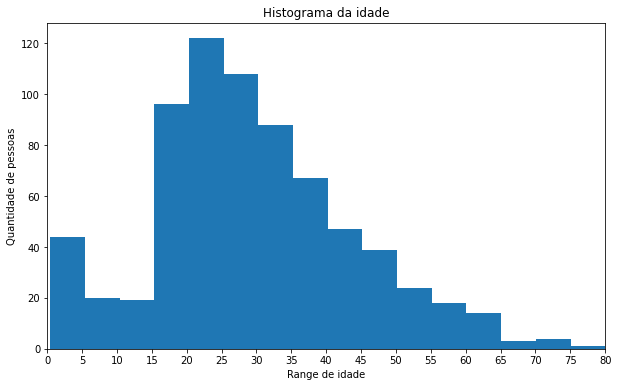

In [ ]:
#Criando um dataframe só com as idades
df_idades = df_titanic['Age']
#Removendo os valores nulos
df_idades = df_idades.dropna(axis=0)


#Criando os ranges de valores
rotulos_x = [i for i in range(0,90, 5)]

df_idades.plot(kind='hist', bins = 16, xlim=(0, 80), xticks=rotulos_x, figsize=(10, 6))

#Seta as labels do nosso histograma
plt.title('Histograma da idade')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Range de idade')

plt.show()

* Qual a relação da idade com a sobrevivência?


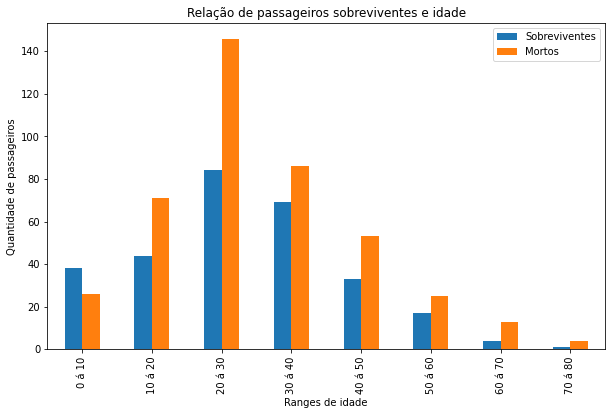

In [ ]:
#Criando um dataframe com as informações de idade e sobrevivencia
df_idades_sobreviventes = df_titanic.loc[:,['Age', 'Survived']]

#Criando os ranges de idade
bin = [i for i in range(0,90, 10)]
label = [f'{i} á {i+10}'for i in range(0,80, 10)]

#Criando substituindo os valores de idade pelos ranges.
df_idades_sobreviventes['Age'] = pd.cut(df_idades_sobreviventes['Age'], bins=bin, labels=label)

#Removendo os números nulos que não serão utilizados por enquanto
df_idades_sobreviventes.dropna(axis=0, inplace=True)

#Criando dois dataframes com os dados de sobreviventes e mortos
sobreviventes = df_idades_sobreviventes.where(df_idades_sobreviventes['Survived']==1).groupby('Age').count()
mortos =  df_idades_sobreviventes.where(df_idades_sobreviventes['Survived']==0).groupby('Age').count()

#Ajustando os nomes das colunas
sobreviventes.rename(columns={'Survived':'Sobreviventes'}, inplace = True)
mortos.rename(columns={'Survived':'Mortos'}, inplace = True)

#Juntando todos os dados em um unico dataframe
df_idades_sobreviventes = pd.concat([sobreviventes,mortos], axis=1)

#Criando um gráfico com as informações
df_idades_sobreviventes.plot(kind='bar', figsize=(10, 6))

plt.xlabel("Ranges de idade")
plt.ylabel("Quantidade de passageiros")
plt.title("Relação de passageiros sobreviventes e idade")

plt.show()

In [ ]:
labels = []
for i in df_idades_sobreviventes.transpose():
  labels.append(i)

for i in range(len(df_idades_sobreviventes)):
  total = df_idades_sobreviventes['Mortos'][i]+df_idades_sobreviventes['Sobreviventes'][i]
  porcentagem = df_idades_sobreviventes['Sobreviventes'][i]/total
  print(f"A porcentagem de sobrevivencia na faixa etária de {labels[i]} é de: {porcentagem: .2%}")

A porcentagem de sobrevivencia na faixa etária de 0 á 10 é de:  59.38%
A porcentagem de sobrevivencia na faixa etária de 10 á 20 é de:  38.26%
A porcentagem de sobrevivencia na faixa etária de 20 á 30 é de:  36.52%
A porcentagem de sobrevivencia na faixa etária de 30 á 40 é de:  44.52%
A porcentagem de sobrevivencia na faixa etária de 40 á 50 é de:  38.37%
A porcentagem de sobrevivencia na faixa etária de 50 á 60 é de:  40.48%
A porcentagem de sobrevivencia na faixa etária de 60 á 70 é de:  23.53%
A porcentagem de sobrevivencia na faixa etária de 70 á 80 é de:  20.00%


* Qual a relação do sexo com a sobrevivência?

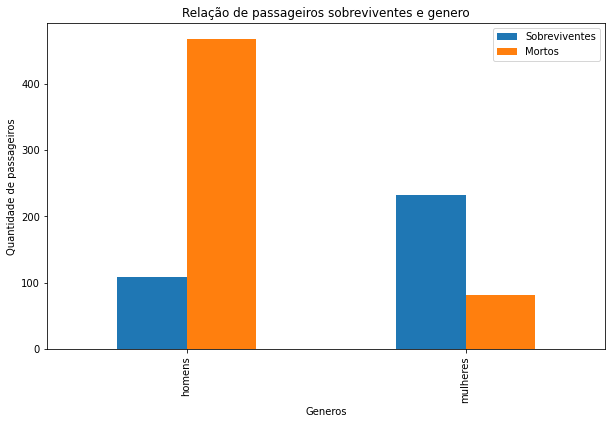

In [ ]:
#Criando um dataframe com as informações de idade e sobrevivencia
df_genero_sobreviventes = df_titanic.loc[:,['Sex', 'Survived']]

df_genero_sobreviventes['Sex'] = df_genero_sobreviventes['Sex'].map({'female':'mulheres',
                             'male':'homens'},
                             na_action=None)

#Removendo os números nulos que não serão utilizados por enquanto
df_genero_sobreviventes.dropna(axis=0, inplace=True)

#Criando dois dataframes com os dados de sobreviventes e mortos
sobreviventes = df_genero_sobreviventes.where(df_genero_sobreviventes['Survived']==1).groupby('Sex').count()
mortos =  df_genero_sobreviventes.where(df_genero_sobreviventes['Survived']==0).groupby('Sex').count()

#Ajustando os nomes das colunas
sobreviventes.rename(columns={'Survived':'Sobreviventes'}, inplace = True)
mortos.rename(columns={'Survived':'Mortos'}, inplace = True)

#Juntando todos os dados em um unico dataframe
df_genero_sobreviventes = pd.concat([sobreviventes,mortos], axis=1)

#Criando um gráfico com as informações
df_genero_sobreviventes.plot(kind='bar', figsize=(10, 6))

plt.xlabel("Generos")
plt.ylabel("Quantidade de passageiros")
plt.title("Relação de passageiros sobreviventes e genero")

plt.show()

In [ ]:
labels = []
for i in df_genero_sobreviventes.transpose():
  labels.append(i)

for i in range(len(df_genero_sobreviventes)):
  total = df_genero_sobreviventes['Mortos'][i]+df_genero_sobreviventes['Sobreviventes'][i]
  porcentagem = df_genero_sobreviventes['Sobreviventes'][i]/total
  print(f"A porcentagem de sobrevivencia de {labels[i]} é de: {porcentagem: .2%}")

A porcentagem de sobrevivencia de homens é de:  18.89%
A porcentagem de sobrevivencia de mulheres é de:  74.20%


3) Transforme a coluna de dados *Sex* em valores numéricos:

In [ ]:
variavel_dummy_1 = pd.get_dummies(df_titanic['Sex'])
df_titanic = pd.concat([df_titanic,variavel_dummy_1], axis=1)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,1


4) Transforme a coluna de dados *Embarked* em valores numéricos.

In [ ]:
variavel_dummy_2 = pd.get_dummies(df_titanic['Embarked'])
df_titanic = pd.concat([df_titanic,variavel_dummy_2], axis=1)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1


5) Transforme a coluna de dados *Name* em valores numéricos.

In [ ]:
title = df_titanic['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.rstrip().str.lower()
variavel_dummy_3 =  pd.get_dummies(title)
df_titanic = pd.concat([df_titanic,variavel_dummy_3], axis=1)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,master,miss,mlle,mme,mr,mrs,ms,rev,sir,the countess
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,0,0,0


6) Trate os valores nulos dos dados:

* Usando a média, mediana, conforme o tratamento que achar melhor.

In [ ]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'C', 'Q', 'S', 'female', 'male'],
      dtype='object')

In [ ]:
#Tratando o campo idade pela media das idades
media_idade = round(df_titanic['Age'].mean())
df_titanic['Age'].fillna(value=media_idade, inplace=True)
df_titanic.Age.isna().value_counts()

False    891
Name: Age, dtype: int64

In [ ]:
#Inserindo o valor mais frequente na coluna Embarked
moda = df_titanic.Embarked.mode()
df_titanic['Embarked'].fillna(value=moda[0], inplace=True)
df_titanic.Embarked.isna().value_counts()

False    891
Name: Embarked, dtype: int64

In [ ]:
#Removendo a coluna que possui menos de 25% de dados.
df_titanic.dropna(axis=1, inplace=True)

7) Agora é a etapa em que continuaremos tratando os nossos dados, separando-os em treino e validação, que será usado para comparação de diferentes modelos e hiperparâmetros.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split

#Criação da base de treinamento
titanic_alvo = df_titanic.Survived
colunas = ['Pclass', 'Age', 'SibSp','Parch', 'Fare','C', 'Q', 'S', 'female', 'male']
df_titanic_prevision = df_titanic[colunas]
treino_predicao, valor_predicao, treino_campo_alvo, valor_campo_alvo = train_test_split(df_titanic_prevision, titanic_alvo, random_state=1)

#Criação de uma nova floresta
rf_model = RandomForestRegressor(random_state = 1)

#Treinando o modelo
rf_model.fit(treino_predicao, treino_campo_alvo)

#Validando a acuracia do modelo
rf_val_predictions = rf_model.predict(valor_predicao)

#Normalizando a saida
rf_val_predictions = [round(sobrevivente) for sobrevivente in rf_val_predictions]
print(rf_val_predictions)

#Validando a acuracia do nosso modelo
rf_val_mae = mean_absolute_error(rf_val_predictions, valor_campo_alvo)

print(f"Validation MAE for Random Forest Model: {rf_val_mae}")

[1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]
Validation MAE for Random Forest Model: 0.2242152466367713


8) Normalize ou padronize os dados, usando a biblioteca Sklearn.

9) Use as métricas de classificação (acurácia, f1 score, recall e roc_auc) para escolha dos melhores modelos.

**Obs.1:** Use os modelos XGBoost, RandomForest, LogisticRegression e SVM para comparação.

**Obs.2:** Escolha uma semente pseudoaletaória para comparação justa dos modelos.

Por fim, treine o melhor modelo, ajustando hiperparâmetros e retorne para o arquivo de submissão a resposta do seu modelo de classificação.

10) Caso você tenha apenas os modelos RandomForest e o SVM modelados anteriormente e não possa rodar os experimentos com outros parâmetros. Qual é a a alternativa que justificaria a sua escolha pelo melhor modelo?